In [2]:
# Importing codes
import numpy as np;
import math;
import matplotlib.pyplot as plt # time to plot some graph
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score
import datetime

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
# Reading of files

train_data = []
sales = []
isFirst = True

print("reading train_processed.csv")

with open("./train_processed.csv") as f:
    for line in iter(f.readline, ''):
        if(isFirst):
            isFirst = False
            print(line)
            continue
        datas = line.split(",")
        temp = []
        for i in range(0, len(datas)):
            if(i == 3):
                sales.append(datas[i].strip())
            else:
                temp.append(datas[i].strip())
        train_data.append(temp)

print(train_data[1])
sales = np.array(sales)
train_data = np.array(train_data)

print("reading test_v2.csv")

test_data = []
isFirst = True

with open("./test_v2.csv") as f:
    for line in iter(f.readline, ''):
        if(isFirst):
            isFirst = False
            print(line)
            continue
        datas = line.split(",")
        temp = []
        for data in datas:
            temp.append(data.strip())
        test_data.append(temp)
        
print(test_data[1])
test_data = np.array(test_data)

print(test_data.shape[0])
print(sales.shape[0])

reading train_processed.csv
"Store","DayOfWeek","Date","Sales","Customers","Open","Promo","StateHoliday","SchoolHoliday"

['2', '5', '2015-01-30', '624', '1', '1', '0', '0']
reading test_v2.csv
"Store","DayOfWeek","Date","Customers","Open","Promo","StateHoliday","SchoolHoliday"

['2', '5', '2015-07-31', '625', '1', '1', '"0"', '"1"']
33450
66900


In [10]:
# preprocess
for i in range(0, train_data.shape[0]):
    # step 1: convert date to long
    date = train_data[i][2].split('-')
    train_data[i][2] = datetime.datetime(int(date[0]), int(date[1]), int(date[2]), 0, 0).timestamp()
    # step 2: convert state holiday and school holiday to integer
    #print(train_data[i][6].split('"')[0])
print(train_data[0])

['1' '5' '1422547200' '616' '1' '1' '0' '0']


In [5]:
# helper function

# using the formula 1/N ∑N E(xn)
def calculateE(inputs, output, clf):
    E_total = 0
    total = output.shape[0]
    for i in range(0, total):
        if(clf.predict(np.c_[inputs[i][0].ravel(), inputs[i][1].ravel()]) != output[i]):
            E_total += 1
    return 1.0 * E_total / total

# alternate E(xn)
def calculateE2(inputs, output, clf):
    return 1 - clf.score(inputs,output)

# plotting of graph to see how it is scattered
def plotGraph(datas, output, tableName):
    plt.scatter(datas[:, 0], datas[:, 1], c=output, cmap=plt.cm.coolwarm)
    plt.xticks(())
    plt.yticks(())
    plt.title(tableName)
    plt.show()

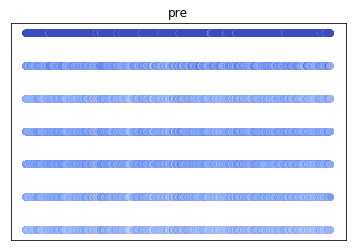

In [11]:
plotGraph(train_data, sales, 'pre')

In [ ]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),'Adaptive Boosting Classifier':AdaBoostClassifier(),'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),'Logistic Regression':LogisticRegression(),'Random Forest Classifier': RandomForestClassifier(),'K Nearest Neighbour':KNeighborsClassifier(8)}

In [ ]:
cls = RandomForestClassifier()
cls.fit(train_data,sales)
y_out2 = cls.predict(train_data)
accuracy = m.accuracy_score(sales,y_out2)
print(cls)
print(accuracy)